Looking at the candidate MWDs from https://arxiv.org/pdf/0704.0789.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [24]:
#specs = glob.glob('sdss_spectra/*.dat')
specs = ['sdss_spectra/SDSSJ082828.18+471737.9_51981-00549-0338.dat', 'sdss_spectra/SDSSJ125250.03-020608.1_51694-00338-0343.dat'] #order they are in the paper to avoid confusion
specs

['sdss_spectra/SDSSJ082828.18+471737.9_51981-00549-0338.dat',
 'sdss_spectra/SDSSJ125250.03-020608.1_51694-00338-0343.dat']

What units are these?

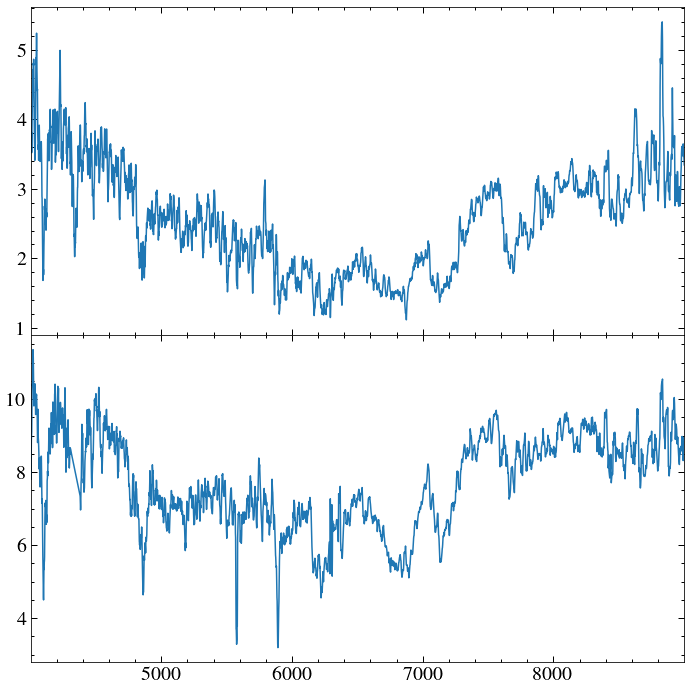

In [29]:
#recreating their figure

plt.figure(figsize=(10,10))
for i, spec in enumerate(specs):
    plt.subplot(2, 1, i+1)
    w, f, e, sky= np.loadtxt(spec, unpack=True)
    f = convolve(f,Box1DKernel(10))
    plt.plot(w,f/1e-17)
    if i == 0:
        plt.xticks(visible=False)
    plt.xlim(4001, 8999)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
#     plt.show()

In [71]:
B_cand = [8e6, 3e6]
B_e = [[5e6, 5e6], [5e6, 3e6]]

In [44]:
hlines = [4861.35, 6562.79]

def picomps(l0, B, z=1.43):
    """
    Returns the pi components of a zeeman-split line l0 for magnetic field B 
    """
    dl = 4.67e-13 * z* l0**2 * B
    return [l0-dl, l0+dl]



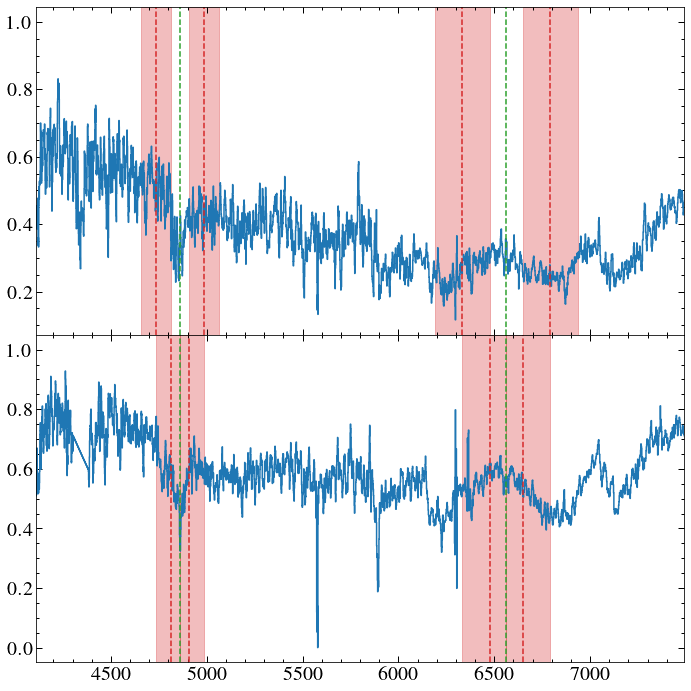

In [99]:
plt.figure(figsize=(10,10))
for i, spec in enumerate(specs):
    plt.subplot(2, 1, i+1)
    w, f, e, sky= np.loadtxt(spec, unpack=True)
    f = convolve(f,Box1DKernel(5))
   # for j, hline in enumerate(hlines):
   # plt.subplot(2,2, len(specs)*i+j+1)
    plt.step(w,f/np.max(f), where='mid')
    if i == 0:
        plt.xticks(visible=False)
   # plt.xlim(5500, 7500)
   # plt.ylim(0.1, 0.75)
   # if j == 0:
    #    plt.xlim(4100, 5500)
     #   plt.ylim(0.31, 0.85)
    plt.xlim(4110, 7490)
    plt.ylim()
    [plt.axvline(line, ls='--', c='C2') for line in hlines]
    for line in hlines:
        pis = picomps(line, B_cand[i])
       # print(pis)
        [plt.axvline(line, ls='--', c='C3') for line in pis]

        pis_up = picomps(line, B_cand[i]+B_e[i][0])
        #[plt.axvline(line, ls='--', alpha=0.5, c='C3') for line in pis_up]
        pis_down = picomps(line, B_cand[i]-B_e[i][1])
        #[plt.axvline(line, ls='--', alpha=0.5, c='C3') for line in pis_down]
        plt.axvspan(pis_up[0], pis_down[0], color='C3', alpha=0.3)
        plt.axvspan(pis_down[1], pis_up[1], color='C3', alpha=0.3)
        
    
plt.tight_layout()
plt.subplots_adjust(hspace=0)
#     plt.show()